# Векторизированные вычислениям на NumPy

## ИУ5 ОАД

### Цель лабораторной работы:
Изучение и применение векторизированных вычислений с использованием библиотеки NumPy для эффективной обработки массивов данных в языке программирования Python.

### Задачи:

> Изучение основных принципов векторизированных вычислений и преимуществ использования библиотеки NumPy.

> Освоение основных функций NumPy для работы с многомерными массивами.

> Решение задач, требующих обработки данных в векторизированной форме.

> Сравнение производительности векторизированных вычислений с обычными циклами в Python.

## Задание

#### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) 

In [2]:
import numpy as np

def diagonal_nonzero_product(matrix):
  diag = np.diag(matrix)
  nonzero_diag = diag[diag != 0]
  if nonzero_diag.size == 0:
    return 1
  else:
    return np.prod(nonzero_diag)

X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
result = diagonal_nonzero_product(X)
print(result)

3


#### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [3]:
def build_vector_from_matrix(X, i, j):

  return np.array([X[i[k], j[k]] for k in range(len(i))])

# Пример использования:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
i = np.array([0, 1, 2, 3])
j = np.array([0, 1, 2, 0])

result_vector = build_vector_from_matrix(X, i, j)
result_vector

array([1, 0, 3, 4])

#### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) 

In [4]:
def are_multisets_equal(x, y):
  return np.array_equal(np.sort(x), np.sort(y))

x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

print(are_multisets_equal(x, y))

True


#### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 

In [6]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
indices = np.where(x[:-1] == 0)[0] + 1
max_value = np.max(x[indices])
print(max_value)

5


#### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [7]:
!pip install pillow
!pip install imageio

(285, 285, 3)


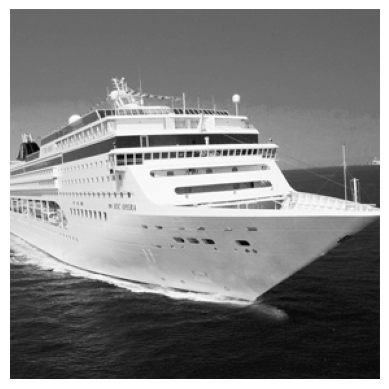

In [8]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

weights = np.array([0.299, 0.587, 0.114])
image = iio.imread('OP.jpg')
print(image.shape)
gray_image = np.dot(image[..., :3], weights)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

#### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). 

In [9]:
def run_length_encoding(x):
  numbers = []
  counts = []
  current_number = x[0]
  current_count = 1
  for i in range(1, len(x)):
    if x[i] == current_number:
      current_count += 1
    else:
      numbers.append(current_number)
      counts.append(current_count)
      current_number = x[i]
      current_count = 1
  numbers.append(current_number)
  counts.append(current_count)
  return np.array(numbers), np.array(counts)

x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
numbers, counts = run_length_encoding(x)
print(numbers, counts)

[2 3 5 2] [3 3 1 2]


#### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

##### Ссылки на документацю numpy:

> https://numpy.org/devdocs

> https://numpy.org/devdocs/user/quickstart.html

In [10]:
import numpy as np
from scipy.spatial.distance import cdist

def euclidean_distance_matrix(X, Y):
  return np.sqrt(np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2))

X = np.random.rand(5, 3)
Y = np.random.rand(4, 3)

distance_matrix_manual = euclidean_distance_matrix(X, Y)
distance_matrix_cdist = cdist(X, Y, 'euclidean')
print(np.allclose(distance_matrix_manual, distance_matrix_cdist))

True
